# Análisis de datos del experimento 3:

## 1) Análisis de la base de datos:

In [1]:
#Número del experimento:
exp_num = 3

In [2]:
# Copio manualmente los siguientes datos del experimento para poder saber qué base de datos leer:
max_ruido_dB = -60 
add_noise = True
snr = [-5, 20] 
tr_aug = [0.2, 3.1, 0.1] 
drr_aug = [-6, 19, 1]

#La base de datos es: 
db_name = f'base_de_datos_{max_ruido_dB}_noise_{add_noise}_traug_{tr_aug[0]}_{tr_aug[1]}_{tr_aug[2]}_drraug_{drr_aug[0]}_{drr_aug[1]}_{drr_aug[2]}_snr_{snr[0]}_{snr[-1]}'

In [3]:
# Copio manualmente los datos de la red dentro del experimento para poder reconstruir el modelo:
#Parámetros de la red:
filters = [32, 18, 8, 4] 
kernel_size = [10, 5, 5, 5] 
activation = ['relu','relu','relu','relu'] 
pool_size = [2,2,2]
learning_rate = 0.001

In [4]:
# Importo paquetes:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import pickle
import numpy as np
from scipy import stats
from progress.bar import IncrementalBar
import matplotlib

In [5]:
resumen_t30 = {'Banda [Hz]': [], 'r': [], 'p': [], 'Tot audios': [], 'Percentil 95': [], 'Max': [], 'Min': []}
resumen_c50 = {'Banda [Hz]': [], 'r': [], 'p': [], 'Tot audios': [], 'Percentil 95': [], 'Max': [], 'Min': []}
resumen_c80 = {'Banda [Hz]': [], 'r': [], 'p': [], 'Tot audios': [], 'Percentil 95': [], 'Max': [], 'Min': []}
resumen_d50 = {'Banda [Hz]': [], 'r': [], 'p': [], 'Tot audios': [], 'Percentil 95': [], 'Max': [], 'Min': []}

In [6]:
partitions = os.listdir(f'../cache/{db_name}')
db = pd.DataFrame()
bar = IncrementalBar('Reading data base', max = len(partitions))
for partition in partitions:
    #Leo la base de datos:
    with open(f'../cache/{db_name}/{partition}', "rb") as fh:
        aux_df = pickle.load(fh)
    db = db.append(aux_df, ignore_index=True)
    bar.next()
bar.finish()
db.head()

<ipython-input-6-96076f6a57f6>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  db = db.append(aux_df, ignore_index=True)


ReverbedAudio  banda  \
0  F1s3|sintetica_Seed1565004433_Tr2.8|original    125   
1  F1s3|sintetica_Seed1565004433_Tr2.8|original    250   
2  F1s3|sintetica_Seed1565004433_Tr2.8|original    500   
3  F1s3|sintetica_Seed1565004433_Tr2.8|original   1000   
4  F1s3|sintetica_Seed1565004433_Tr2.8|original   2000   

                                                 tae  \
0  [0.004001711796526608, 0.46583613984104727, 0....   
1  [0.004910805494766889, 0.47390677703187795, 0....   
2  [0.0008454078947145141, 0.5061136212583385, 0....   
3  [0.0033014709364472482, 0.46929883034385605, 0...   
4  [0.004001420299786958, 0.46737971348460433, 0....   

                                         descriptors       snr        drr  
0  [2.736479380744559, -6.038189124096391, -4.297...  2.471715 -12.053504  
1  [2.8057585490321384, -3.6626970334729685, -1.9...  2.461909  -9.832319  
2  [2.7910607891917456, -4.718704667784649, -2.82... -1.649401 -13.051719  
3  [2.813513518158915, -6.665483099286145, -3.814...  5.011190 -13.550271  
4  [2.799113897475244, -5.936620211234544, -3.447...  1.990429 -14.256546

In [ ]:
#Boxplot de los valores de T30 por bandas de frecuencia:

df_boxplot = pd.DataFrame({'Banda [Hz]': db.banda.to_list(), 
                           'DRR [dB]': db.drr.to_list(), 
                           'T30 [s]': list(map(lambda x: x[0], db.descriptors.to_list()))})

#plt.figure(figsize=(10,7))
sns.set(rc={'figure.figsize': (10, 7)})
sns.boxplot(x='Banda [Hz]', y='T30 [s]', data=df_boxplot, palette="Pastel1")
plt.show()

In [ ]:
#Boxplot de los valores de DRR por bandas de frecuencia:

#plt.figure(figsize=(10,7))
sns.set(rc={'figure.figsize': (10, 7)})
sns.boxplot(x='Banda [Hz]', y='DRR [dB]', data=df_boxplot, palette="Pastel1")
plt.show()

In [7]:
#Veo cuántos audios hay por banda:
bands = [125, 250, 500, 1000, 2000, 4000, 8000]

resumen_db = {'Banda [Hz]': [], 'Tot audios': [], }

for band in bands:
    
    tot_data_per_band = len(db.loc[db.banda == band])
    
    db_band = db.loc[db.banda == band]
    descriptors = db_band.descriptors.to_numpy()

    t30, c50, c80, d50 = [], [], [], []
    for values in descriptors:
        t30.append(values[0])
        c50.append(values[1])
        c80.append(values[2])
        d50.append(values[3])

    resumen_t30['Tot audios'].append(tot_data_per_band)
    resumen_t30['Percentil 95'].append(np.round(np.percentile(t30, 95),3))
    resumen_t30['Max'].append(np.round(np.max(t30),3))
    resumen_t30['Min'].append(np.round(np.min(t30),3))

    resumen_c50['Tot audios'].append(tot_data_per_band)
    resumen_c50['Percentil 95'].append(np.round(np.percentile(c50, 95),3))
    resumen_c50['Max'].append(np.round(np.max(c50),3))
    resumen_c50['Min'].append(np.round(np.min(c50),3))

    resumen_c80['Tot audios'].append(tot_data_per_band)
    resumen_c80['Percentil 95'].append(np.round(np.percentile(c80, 95),3))
    resumen_c80['Max'].append(np.round(np.max(c80),3))
    resumen_c80['Min'].append(np.round(np.min(c80),3))

    resumen_d50['Tot audios'].append(tot_data_per_band)
    resumen_d50['Percentil 95'].append(np.round(np.percentile(d50, 95),3))
    resumen_d50['Max'].append(np.round(np.max(d50),3))
    resumen_d50['Min'].append(np.round(np.min(d50),3))

In [8]:
#Tiempo de reverberación por banda y por sala:

great_hall = {'Name': [], 'Band': [], 'T30': []}
octagon = {'Name': [], 'Band': [], 'T30': []}
classroom = {'Name': [], 'Band': [], 'T30': []}

for i in range(len(db)):

    if ('great_hall' in db.ReverbedAudio[i]) and ('original' in db.ReverbedAudio[i]):
        great_hall['Name'].append(db.ReverbedAudio[i].split('|')[1])
        great_hall['Band'].append(db.banda[i])
        great_hall['T30'].append(db.descriptors[i][0])

    elif ('octagon' in db.ReverbedAudio[i]) and ('original' in db.ReverbedAudio[i]):
        octagon['Name'].append(db.ReverbedAudio[i].split('|')[1])
        octagon['Band'].append(db.banda[i])
        octagon['T30'].append(db.descriptors[i][0])

    elif ('classroom' in db.ReverbedAudio[i]) and ('original' in db.ReverbedAudio[i]):
        classroom['Name'].append(db.ReverbedAudio[i].split('|')[1])
        classroom['Band'].append(db.banda[i])
        classroom['T30'].append(db.descriptors[i][0])

df_great_hall = pd.DataFrame(great_hall)
df_octagon = pd.DataFrame(octagon)
df_classroom = pd.DataFrame(classroom)


for band in bands:
    print(f'\nBanda {band}:\n')
    df_great_hall_band = df_great_hall.loc[df_great_hall.Band == band]
    df_octagon_band = df_octagon.loc[df_octagon.Band == band]
    df_classroom_band = df_classroom.loc[df_classroom.Band == band]

    print(f'great_hall: Media: {np.round(np.mean(df_great_hall_band.T30.to_numpy()),2)}, Desvío: {np.round(np.std(df_great_hall_band.T30.to_numpy()),2)}')
    print(f'octagon: Media: {np.round(np.mean(df_octagon_band.T30.to_numpy()),2)}, Desvío: {np.round(np.std(df_octagon_band.T30.to_numpy()),2)}')
    print(f'classroom: Media: {np.round(np.mean(df_classroom_band.T30.to_numpy()),2)}, Desvío: {np.round(np.std(df_classroom_band.T30.to_numpy()),2)}')



Banda 125:

great_hall: Media: nan, Desvío: nan
octagon: Media: nan, Desvío: nan
classroom: Media: nan, Desvío: nan

Banda 250:

great_hall: Media: nan, Desvío: nan
octagon: Media: nan, Desvío: nan
classroom: Media: nan, Desvío: nan

Banda 500:

great_hall: Media: 2.44, Desvío: 0.07
octagon: Media: 3.01, Desvío: 0.08
classroom: Media: 2.07, Desvío: 0.04

Banda 1000:

great_hall: Media: 2.48, Desvío: 0.05
octagon: Media: 3.33, Desvío: 0.07
classroom: Media: 1.88, Desvío: 0.03

Banda 2000:

great_hall: Media: 2.34, Desvío: 0.06
octagon: Media: 2.95, Desvío: 0.03
classroom: Media: 1.99, Desvío: 0.02

Banda 4000:

great_hall: Media: 1.93, Desvío: 0.07
octagon: Media: 2.43, Desvío: 0.04
classroom: Media: 1.74, Desvío: 0.02

Banda 8000:

great_hall: Media: 1.36, Desvío: 0.06
octagon: Media: 1.69, Desvío: 0.04
classroom: Media: 1.29, Desvío: 0.01


C:\Users\maxia\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\maxia\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\maxia\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\maxia\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\maxia\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
#Scaterplots de los valores medios de los descriptores T30 y DRR para los audios sintéticos:

mid_bands = [500, 1000] #Bandas que conforman el cálculo para el T30_mid, DRR_mid, C50_mid, C80_mid y D50_mid

T30_mid, DRR_mid = [], []

T30_500, T30_1000 = 0, 0
DRR_500, DRR_1000 = 0, 0

names = db.ReverbedAudio.to_numpy()

for i in range(len(db)):

    if 'sintetica' in db.ReverbedAudio[i]:

        if db.banda[i] == 500:
            T30_500 = db.descriptors[i][0]
            DRR_500 = db.drr[i]

        elif db.banda[i] == 1000:
            T30_1000 = db.descriptors[i][0]
            DRR_1000 = db.drr[i]

        if (names[i] == names[i-1]) and (T30_500 != 0) and (T30_1000 != 0):
            T30_mid.append(np.mean([T30_500, T30_1000]))
            DRR_mid.append(np.mean([DRR_500, DRR_1000]))

            T30_500, T30_1000 = 0, 0
            DRR_500, DRR_1000 = 0, 0
    
    else:
        pass

print('Valores para las RIRs sintéticas')

plt.figure(figsize=(10,7))
plt.plot(T30_mid, DRR_mid, linestyle='', marker='o', alpha=0.5)
plt.xlabel('T30_mid [s]', size=15)
plt.ylabel('DRR_mid [dB]', size=15)
plt.xlim((0, 4))
plt.ylim((-18, 18))
#plt.title('Scatter plot entre el T30_mid y DRR_mid:', loc='left')
matplotlib.rcParams.update({'font.size': 14})
plt.tight_layout()
plt.show()

In [ ]:
#Scaterplots de los valores medios de los descriptores T30 y DRR para los audios reales:

mid_bands = [500, 1000] #Bandas que conforman el cálculo para el T30_mid, DRR_mid, C50_mid, C80_mid y D50_mid

T30_mid, DRR_mid = [], []

T30_500, T30_1000 = 0, 0
DRR_500, DRR_1000 = 0, 0

names = db.ReverbedAudio.to_numpy()

for i in range(len(db)):

    great_hall = ('great_hall' in db.ReverbedAudio[i]) and ('original' in db.ReverbedAudio[i])
    octagon = (('octagon' in db.ReverbedAudio[i]) and ('original' in db.ReverbedAudio[i]))
    classroom = (('classroom' in db.ReverbedAudio[i]) and ('original' in db.ReverbedAudio[i]))

    if  great_hall or octagon or classroom:

        if db.banda[i] == 500:
            T30_500 = db.descriptors[i][0]
            DRR_500 = db.drr[i]

        elif db.banda[i] == 1000:
            T30_1000 = db.descriptors[i][0]
            DRR_1000 = db.drr[i]

        if (names[i] == names[i-1]) and (T30_500 != 0) and (T30_1000 != 0):
            T30_mid.append(np.mean([T30_500, T30_1000]))
            DRR_mid.append(np.mean([DRR_500, DRR_1000]))

            T30_500, T30_1000 = 0, 0
            DRR_500, DRR_1000 = 0, 0
    
    else:
        pass

print('Valores para las RIRs reales')

plt.figure(figsize=(10,7))
plt.plot(T30_mid, DRR_mid, linestyle='', marker='o', alpha=0.5)
plt.xlabel('T30_mid [s]', size=15)
plt.ylabel('DRR_mid [dB]', size=15)
plt.xlim((0, 4))
plt.ylim((-18, 18))
#plt.title('Scatter plot entre el T30_mid y DRR_mid:', loc='left')
matplotlib.rcParams.update({'font.size': 14})
plt.tight_layout()
plt.show()

In [ ]:
#Scaterplots de los valores medios de los descriptores T30 y DRR para los audios aumentados:

mid_bands = [500, 1000] #Bandas que conforman el cálculo para el T30_mid, DRR_mid, C50_mid, C80_mid y D50_mid

T30_mid, DRR_mid = [], []

T30_500, T30_1000 = 0, 0
DRR_500, DRR_1000 = 0, 0

names = db.ReverbedAudio.to_numpy()

for i in range(len(db)):

    if ('TR_var_' in db.ReverbedAudio[i]) or ('DRR_var_' in db.ReverbedAudio[i]):

        if db.banda[i] == 500:
            T30_500 = db.descriptors[i][0]
            DRR_500 = db.drr[i]

        elif db.banda[i] == 1000:
            T30_1000 = db.descriptors[i][0]
            DRR_1000 = db.drr[i]

        if (names[i] == names[i-1]) and (T30_500 != 0) and (T30_1000 != 0):
            T30_mid.append(np.mean([T30_500, T30_1000]))
            DRR_mid.append(np.mean([DRR_500, DRR_1000]))

            T30_500, T30_1000 = 0, 0
            DRR_500, DRR_1000 = 0, 0
    
    else:
        pass

print('Valores para las RIRs aumentadas')

plt.figure(figsize=(10,7))
plt.plot(T30_mid, DRR_mid, linestyle='', marker='o', alpha=0.5)
plt.xlabel('T30_mid [s]', size=15)
plt.ylabel('DRR_mid [dB]', size=15)
plt.xlim((0, 4))
plt.ylim((-18, 18))
#plt.title('Scatter plot entre el T30_mid y DRR_mid:', loc='left')
matplotlib.rcParams.update({'font.size': 14})
plt.tight_layout()
plt.show()

In [ ]:
#Scaterplots de los valores medios de los descriptores T30 y DRR para toda la base de datos:

mid_bands = [500, 1000] #Bandas que conforman el cálculo para el T30_mid, DRR_mid, C50_mid, C80_mid y D50_mid

T30_mid, DRR_mid = [], []

T30_500, T30_1000 = 0, 0
DRR_500, DRR_1000 = 0, 0

names = db.ReverbedAudio.to_numpy()

for i in range(len(db)):

    if db.banda[i] == 500:
        T30_500 = db.descriptors[i][0]
        DRR_500 = db.drr[i]

    elif db.banda[i] == 1000:
        T30_1000 = db.descriptors[i][0]
        DRR_1000 = db.drr[i]

    if (names[i] == names[i-1]) and (T30_500 != 0) and (T30_1000 != 0):
        T30_mid.append(np.mean([T30_500, T30_1000]))
        DRR_mid.append(np.mean([DRR_500, DRR_1000]))

        T30_500, T30_1000 = 0, 0
        DRR_500, DRR_1000 = 0, 0
    

print('Valores para las RIRs de toda la base de datos')

plt.figure(figsize=(10,7))
plt.plot(T30_mid, DRR_mid, linestyle='', marker='o', alpha=0.5)
plt.xlabel('T30_mid [s]', size=15)
plt.ylabel('DRR_mid [dB]', size=15)
plt.xlim((0, 4))
plt.ylim((-18, 18))
#plt.title('Scatter plot entre el T30_mid y DRR_mid:', loc='left')
matplotlib.rcParams.update({'font.size': 14})
plt.tight_layout()
plt.show()

In [ ]:
print(f'Máximo tr_mid {np.max(T30_mid)}, máximo drr {np.max(DRR_mid)}')
print(f'Mínimo tr_mid {np.min(T30_mid)}, mínimo drr {np.min(DRR_mid)}')


Análisis para la banda 125



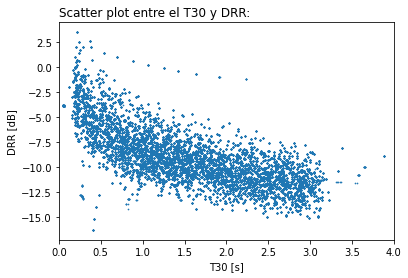

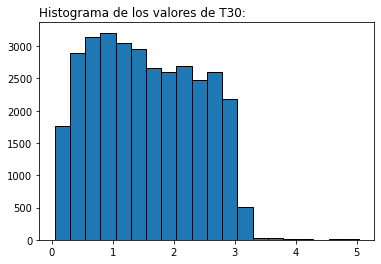

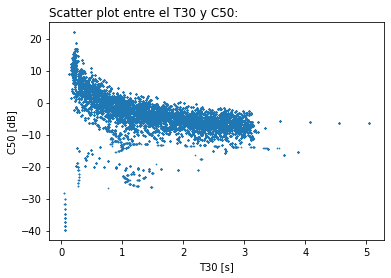

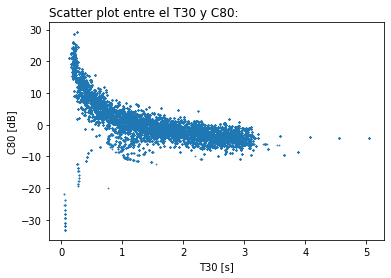


Análisis para la banda 250



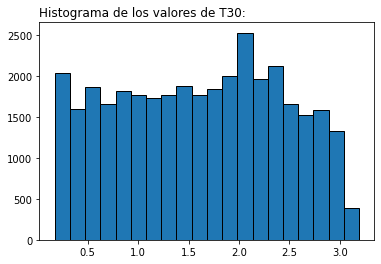

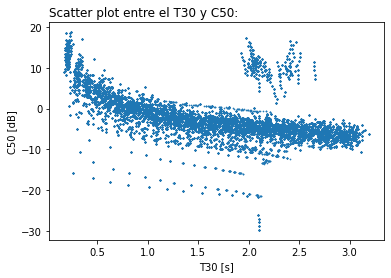

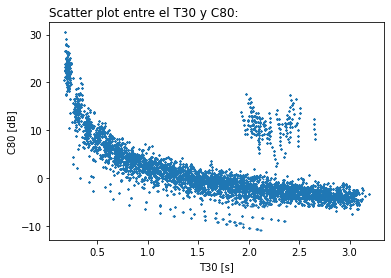


Análisis para la banda 500



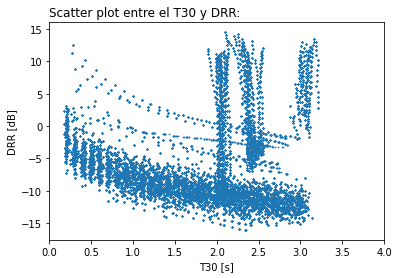

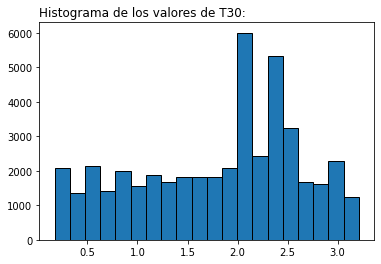

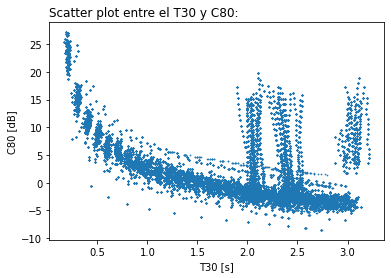


Análisis para la banda 1000



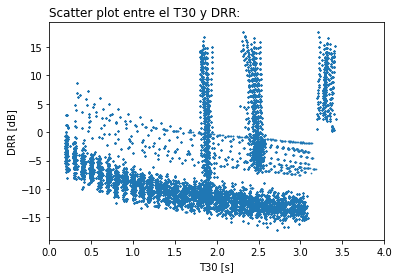

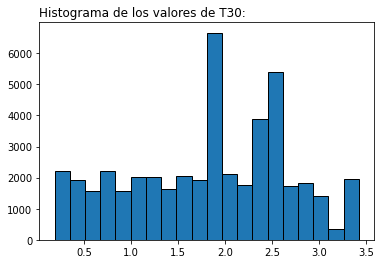

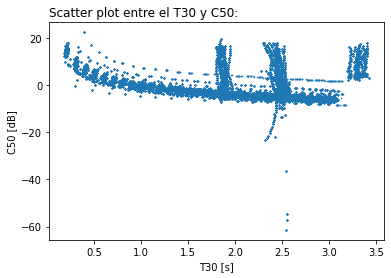

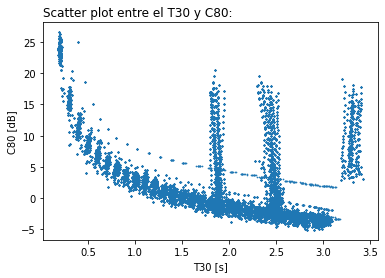

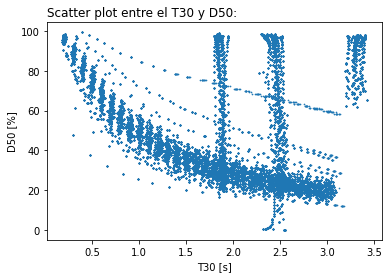


Análisis para la banda 2000



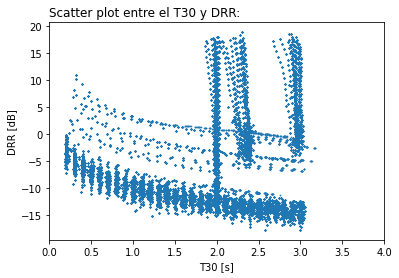

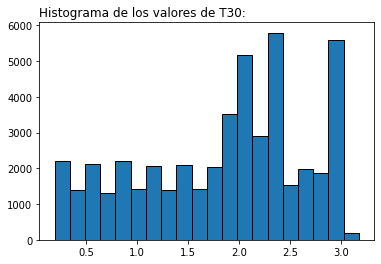

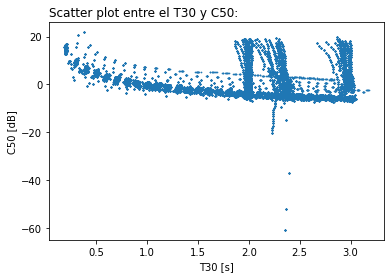

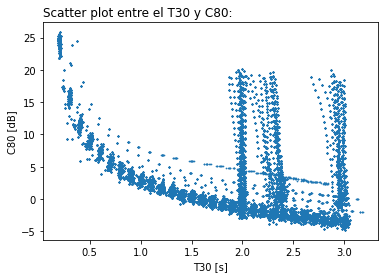

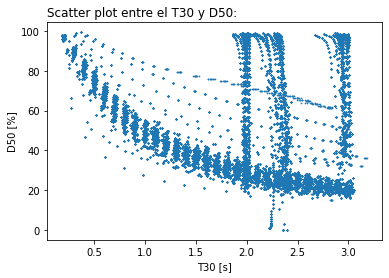


Análisis para la banda 4000



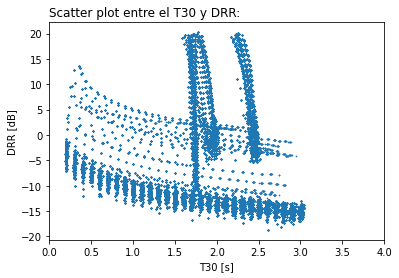

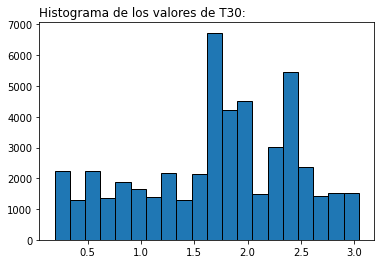

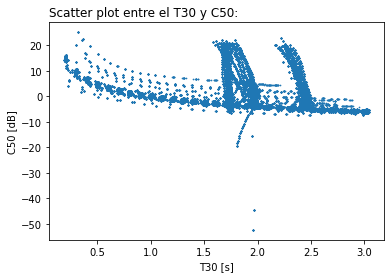

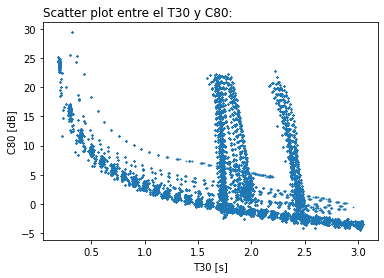

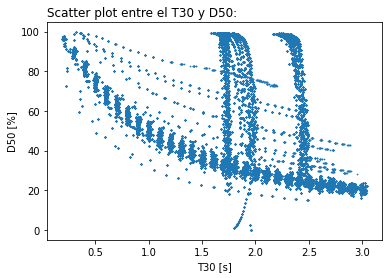


Análisis para la banda 8000



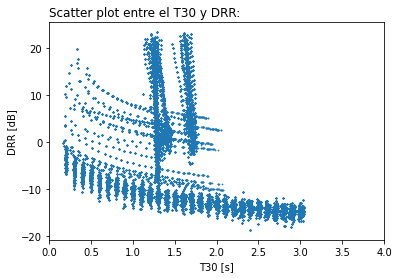

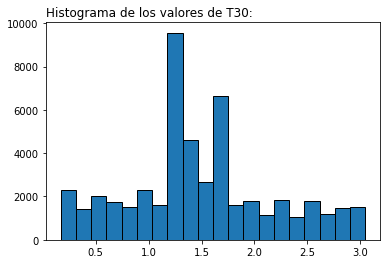

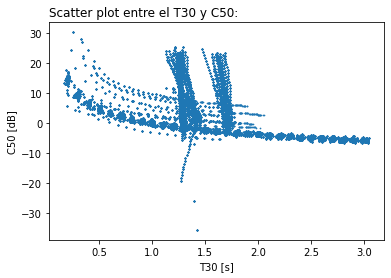

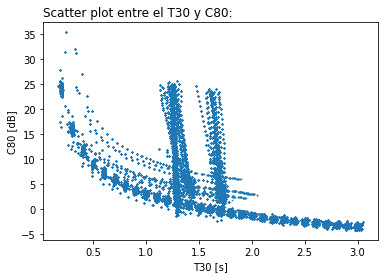

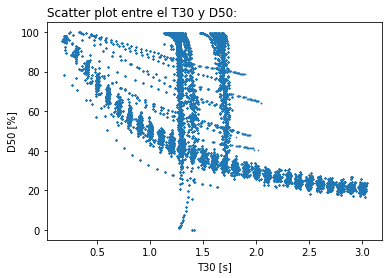

In [8]:
#Análisis de los descriptores por bandas:
for band in bands:
    db_band = db.loc[db.banda == band]

    descriptors = db_band.descriptors.to_numpy()
    drr = db_band.drr.to_numpy()

    t30, c50, c80, d50 = [], [], [], []
    for values in descriptors:
        t30.append(values[0])
        c50.append(values[1])
        c80.append(values[2])
        d50.append(values[3])

    print(f'\nAnálisis para la banda {band}\n')

    plt.plot( t30, drr, linestyle='', marker='o', markersize=0.7)
    plt.xlabel('T30 [s]')
    plt.ylabel('DRR [dB]')
    plt.xlim(0, 4.0)
    plt.title('Scatter plot entre el T30 y DRR:', loc='left')
    plt.show()
    
    plt.hist(t30, bins=20, edgecolor="black")
    plt.title('Histograma de los valores de T30:', loc='left')
    plt.show()

    plt.plot( t30, c50, linestyle='', marker='o', markersize=0.7)
    plt.xlabel('T30 [s]')
    plt.ylabel('C50 [dB]')
    plt.title('Scatter plot entre el T30 y C50:', loc='left')
    plt.show()

    plt.plot( t30, c80, linestyle='', marker='o', markersize=0.7)
    plt.xlabel('T30 [s]')
    plt.ylabel('C80 [dB]')
    plt.title('Scatter plot entre el T30 y C80:', loc='left')
    plt.show()

    plt.plot( t30, d50, linestyle='', marker='o', markersize=0.7)
    plt.xlabel('T30 [s]')
    plt.ylabel('D50 [%]')
    plt.title('Scatter plot entre el T30 y D50:', loc='left')
    plt.show()


## 2) Análisis del entrenamiento:

### Análisis banda 125 Hz:

In [9]:
band = 125

resumen_t30['Banda [Hz]'].append(band)
resumen_c50['Banda [Hz]'].append(band)
resumen_c80['Banda [Hz]'].append(band)
resumen_d50['Banda [Hz]'].append(band)

with open(f'../results/exp{exp_num}/results_{band}.pickle', 'rb') as handle:
  results = pickle.load(handle)

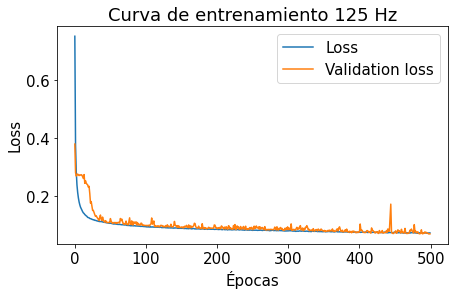

In [10]:
#PLot del val_loss y del loss:
plt.figure(facecolor='white', figsize=[7,4] )
plt.rcParams.update({'font.size': 15})
plt.plot(results['loss'], label='Loss')
plt.plot(results['val_loss'], label='Validation loss')
plt.ylabel('Loss')
plt.xlabel('Épocas')
plt.title(f'Curva de entrenamiento {band} Hz')
plt.legend()
plt.show()

(array([   5.,    7.,   13.,   75., 2100., 4009.,  341.,   19.]),
 array([-1.21, -0.98, -0.75, -0.52, -0.29, -0.06,  0.17,  0.4 ,  0.63]),
 <BarContainer object of 8 artists>)

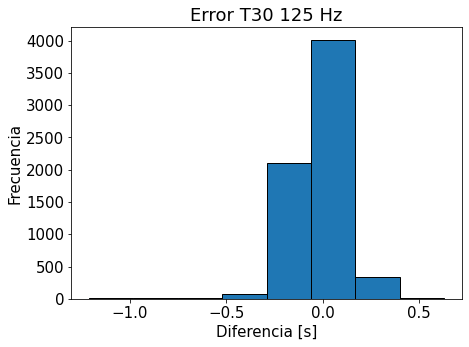

In [11]:
# Error T30:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error T30 {band} Hz')

ax.set_xlabel('Diferencia [s]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_t30'], bins=8, edgecolor="black")

In [12]:
# Error C50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C50 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c50'], bins=8, edgecolor="black")

(array([3.000e+00, 5.700e+01, 2.282e+03, 3.951e+03, 2.560e+02, 1.600e+01,
        3.000e+00, 1.000e+00]),
 array([-2.86   , -1.94875, -1.0375 , -0.12625,  0.785  ,  1.69625,
         2.6075 ,  3.51875,  4.43   ]),
 <BarContainer object of 8 artists>)

(array([2.000e+00, 2.800e+01, 2.300e+02, 4.796e+03, 1.490e+03, 1.800e+01,
        3.000e+00, 2.000e+00]),
 array([-1.75   , -1.27125, -0.7925 , -0.31375,  0.165  ,  0.64375,
         1.1225 ,  1.60125,  2.08   ]),
 <BarContainer object of 8 artists>)

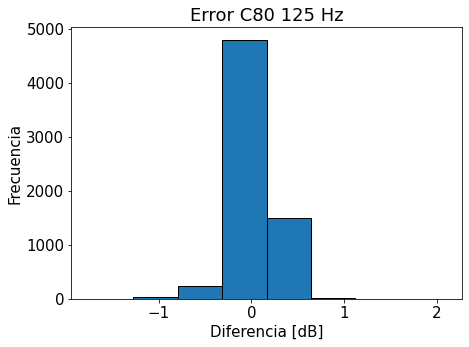

In [13]:
# Error C80:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C80 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c80'], bins=8, edgecolor="black")

In [14]:
# Error D50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error D50 {band} Hz')

ax.set_xlabel('Diferencia [%]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_d50'], bins=8, edgecolor="black")

(array([   3.,   22.,  207., 1262., 2799., 1978.,  264.,   34.]),
 array([-0.74  , -0.5775, -0.415 , -0.2525, -0.09  ,  0.0725,  0.235 ,
         0.3975,  0.56  ]),
 <BarContainer object of 8 artists>)

Text(0, 0.5, 'Valor real [s]')

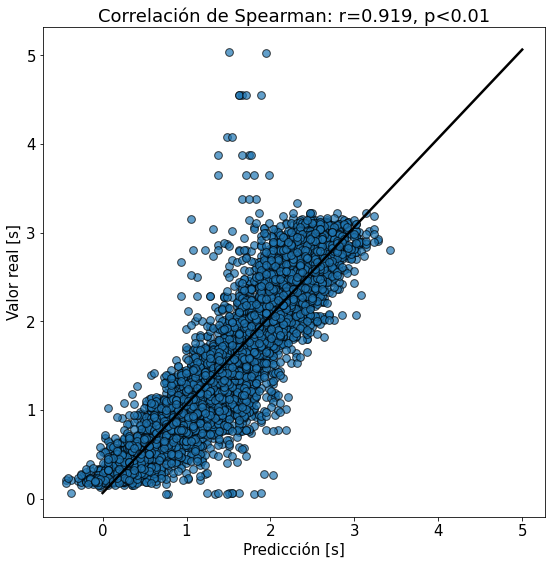

In [15]:
# Generate data: T30
x = [np.round(results['prediction'][i][0] * results['T30_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[0] * results['T30_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_t30['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_t30['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [s]')
ax.set_ylabel('Valor real [s]')

Text(0, 0.5, 'Valor real [dB]')

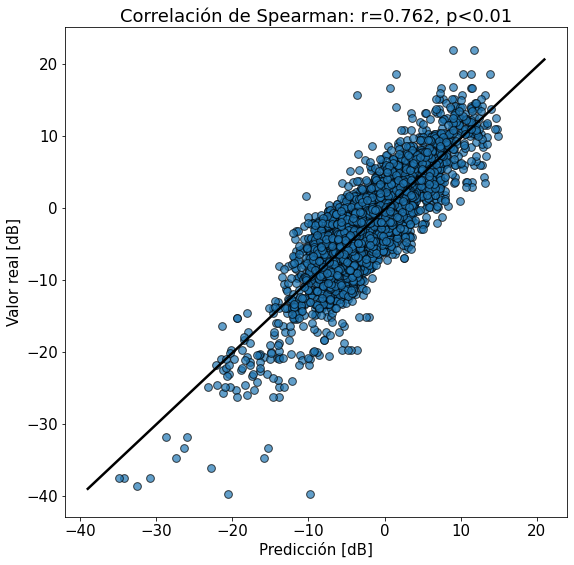

In [16]:
# Generate data: C50
x = [np.round(results['prediction'][i][1] * results['C50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[1] * results['C50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_c50['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_c50['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [dB]')

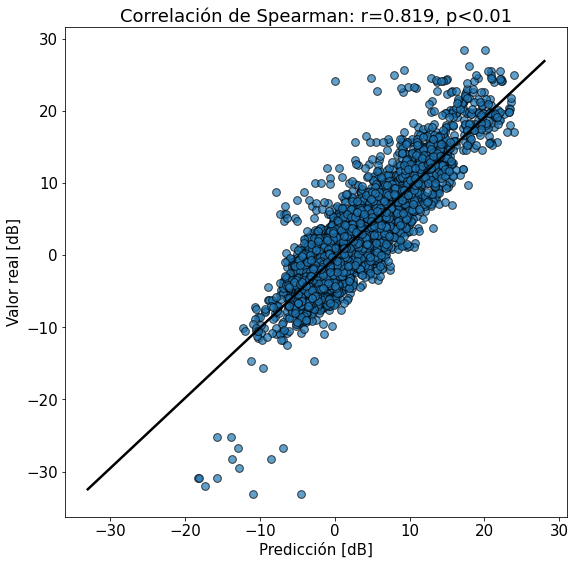

In [17]:
# Generate data: C80
x = [np.round(results['prediction'][i][2] * results['C80_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[2] * results['C80_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_c80['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_c80['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [%]')

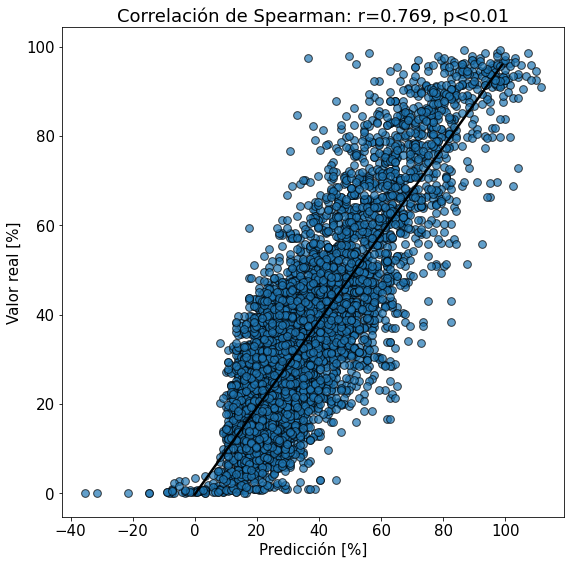

In [18]:
# Generate data: d50
x = [np.round(results['prediction'][i][3] * results['D50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[3] * results['D50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_d50['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_d50['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [%]')
ax.set_ylabel('Valor real [%]')

### Análisis banda 250 Hz:

In [19]:
band = 250

resumen_t30['Banda [Hz]'].append(band)
resumen_c50['Banda [Hz]'].append(band)
resumen_c80['Banda [Hz]'].append(band)
resumen_d50['Banda [Hz]'].append(band)

with open(f'../results/exp{exp_num}/results_{band}.pickle', 'rb') as handle:
  results = pickle.load(handle)

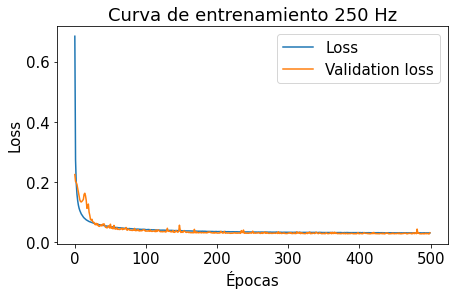

In [20]:
#PLot del val_loss y del loss:
plt.figure(facecolor='white', figsize=[7,4] )
plt.rcParams.update({'font.size': 15})
plt.plot(results['loss'], label='Loss')
plt.plot(results['val_loss'], label='Validation loss')
plt.ylabel('Loss')
plt.xlabel('Épocas')
plt.title(f'Curva de entrenamiento {band} Hz')
plt.legend()
plt.show()

(array([  10.,   41.,  275., 2051., 3387.,  967.,  195.,   19.]),
 array([-0.61  , -0.4575, -0.305 , -0.1525,  0.    ,  0.1525,  0.305 ,
         0.4575,  0.61  ]),
 <BarContainer object of 8 artists>)

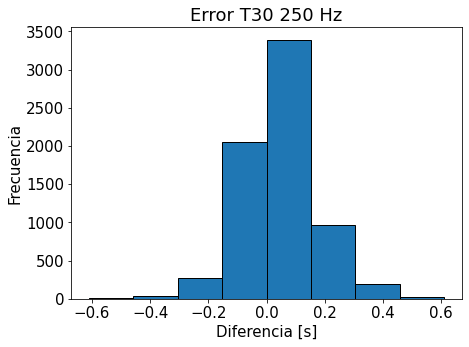

In [21]:
# Error T30:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error T30 {band} Hz')

ax.set_xlabel('Diferencia [s]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_t30'], bins=8, edgecolor="black")

(array([1.100e+01, 1.940e+02, 4.346e+03, 2.261e+03, 9.300e+01, 3.000e+01,
        8.000e+00, 2.000e+00]),
 array([-1.51  , -1.0025, -0.495 ,  0.0125,  0.52  ,  1.0275,  1.535 ,
         2.0425,  2.55  ]),
 <BarContainer object of 8 artists>)

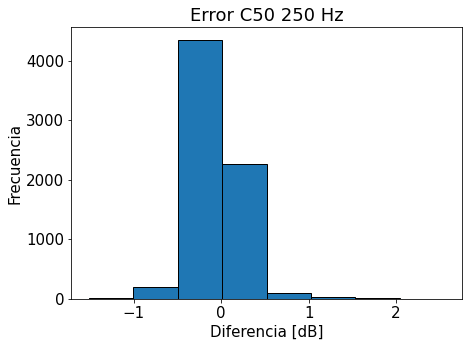

In [22]:
# Error C50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C50 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c50'], bins=8, edgecolor="black")

(array([3.000e+00, 4.000e+00, 1.600e+01, 9.800e+01, 1.554e+03, 4.673e+03,
        5.650e+02, 3.200e+01]),
 array([-1.56   , -1.27625, -0.9925 , -0.70875, -0.425  , -0.14125,
         0.1425 ,  0.42625,  0.71   ]),
 <BarContainer object of 8 artists>)

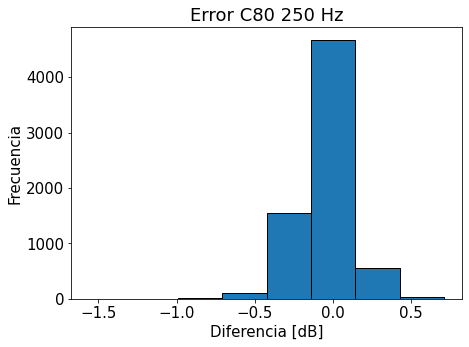

In [23]:
# Error C80:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C80 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c80'], bins=8, edgecolor="black")

(array([   8.,   40.,  387., 2054., 3372.,  993.,   85.,    6.]),
 array([-0.63   , -0.48875, -0.3475 , -0.20625, -0.065  ,  0.07625,
         0.2175 ,  0.35875,  0.5    ]),
 <BarContainer object of 8 artists>)

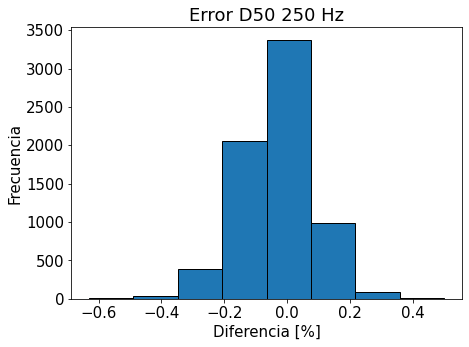

In [24]:
# Error D50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error D50 {band} Hz')

ax.set_xlabel('Diferencia [%]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_d50'], bins=8, edgecolor="black")

Text(0, 0.5, 'Valor real [s]')

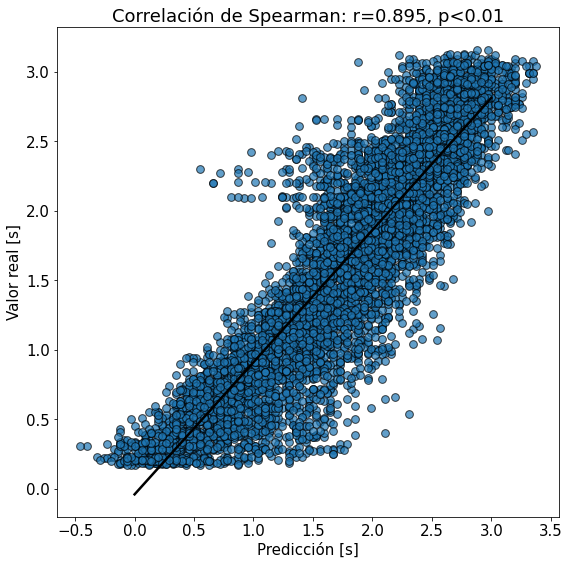

In [25]:
# Generate data: T30
x = [np.round(results['prediction'][i][0] * results['T30_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[0] * results['T30_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_t30['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_t30['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [s]')
ax.set_ylabel('Valor real [s]')

Text(0, 0.5, 'Valor real [dB]')

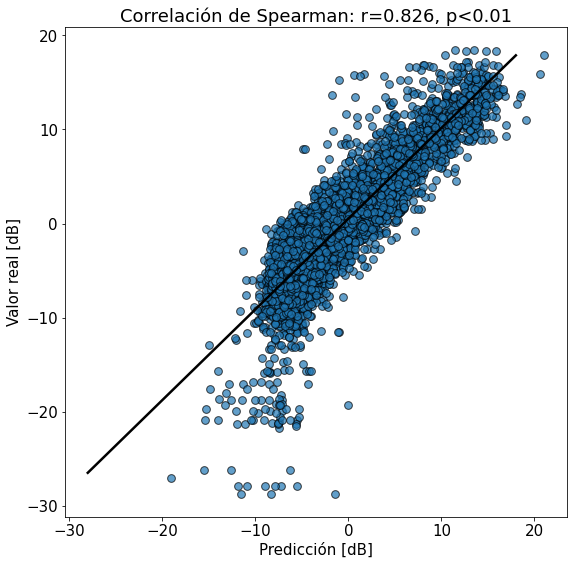

In [26]:
# Generate data: C50
x = [np.round(results['prediction'][i][1] * results['C50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[1] * results['C50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_c50['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_c50['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [dB]')

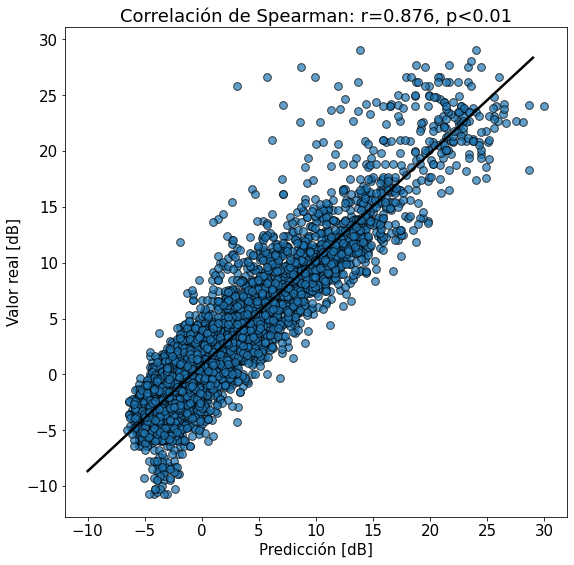

In [27]:
# Generate data: C80
x = [np.round(results['prediction'][i][2] * results['C80_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[2] * results['C80_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_c80['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_c80['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [%]')

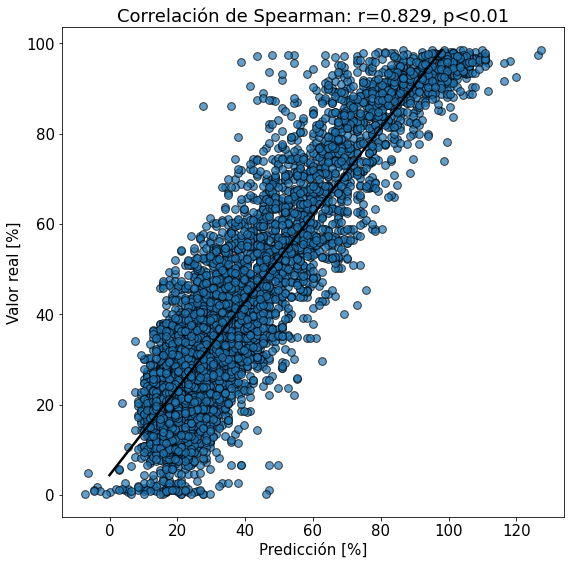

In [28]:
# Generate data: d50
x = [np.round(results['prediction'][i][3] * results['D50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[3] * results['D50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_d50['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_d50['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [%]')
ax.set_ylabel('Valor real [%]')

### Análisis banda 500 Hz:

In [29]:
band = 500

resumen_t30['Banda [Hz]'].append(band)
resumen_c50['Banda [Hz]'].append(band)
resumen_c80['Banda [Hz]'].append(band)
resumen_d50['Banda [Hz]'].append(band)

with open(f'../results/exp{exp_num}/results_{band}.pickle', 'rb') as handle:
  results = pickle.load(handle)

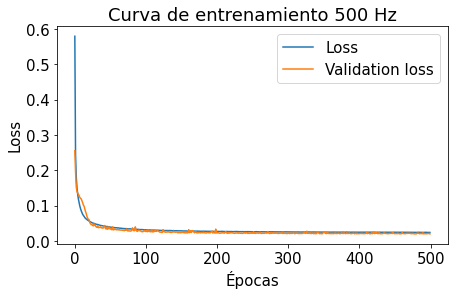

In [30]:
#PLot del val_loss y del loss:
plt.figure(facecolor='white', figsize=[7,4] )
plt.rcParams.update({'font.size': 15})
plt.plot(results['loss'], label='Loss')
plt.plot(results['val_loss'], label='Validation loss')
plt.ylabel('Loss')
plt.xlabel('Épocas')
plt.title(f'Curva de entrenamiento {band} Hz')
plt.legend()
plt.show()

(array([   7.,  224., 1417., 4461., 2511.,  378.,   70.,   20.]),
 array([-0.58   , -0.42125, -0.2625 , -0.10375,  0.055  ,  0.21375,
         0.3725 ,  0.53125,  0.69   ]),
 <BarContainer object of 8 artists>)

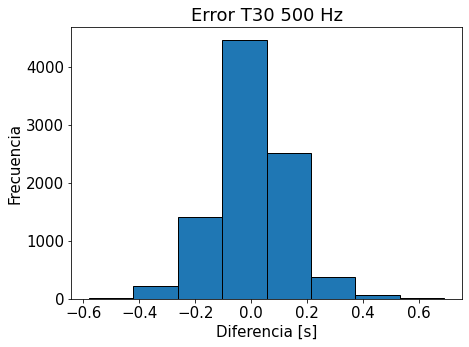

In [31]:
# Error T30:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error T30 {band} Hz')

ax.set_xlabel('Diferencia [s]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_t30'], bins=8, edgecolor="black")

(array([1.150e+02, 8.581e+03, 3.450e+02, 3.700e+01, 7.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00]),
 array([-1.04   , -0.38125,  0.2775 ,  0.93625,  1.595  ,  2.25375,
         2.9125 ,  3.57125,  4.23   ]),
 <BarContainer object of 8 artists>)

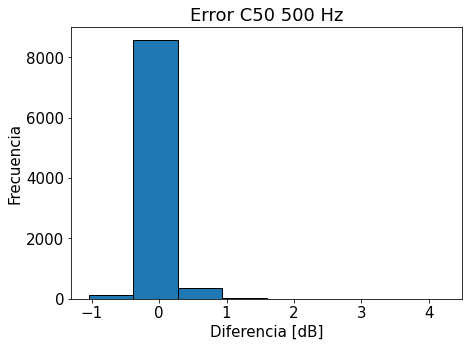

In [32]:
# Error C50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C50 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c50'], bins=8, edgecolor="black")

(array([3.000e+00, 1.600e+01, 7.000e+01, 4.740e+02, 4.654e+03, 3.537e+03,
        3.180e+02, 1.600e+01]),
 array([-1.06 , -0.845, -0.63 , -0.415, -0.2  ,  0.015,  0.23 ,  0.445,
         0.66 ]),
 <BarContainer object of 8 artists>)

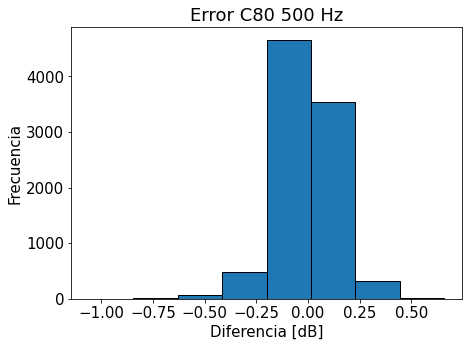

In [33]:
# Error C80:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C80 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c80'], bins=8, edgecolor="black")

(array([1.000e+01, 1.770e+02, 2.431e+03, 5.274e+03, 1.074e+03, 9.700e+01,
        2.000e+01, 5.000e+00]),
 array([-0.5 , -0.35, -0.2 , -0.05,  0.1 ,  0.25,  0.4 ,  0.55,  0.7 ]),
 <BarContainer object of 8 artists>)

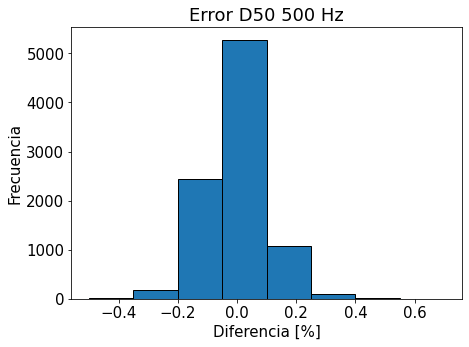

In [34]:
# Error D50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error D50 {band} Hz')

ax.set_xlabel('Diferencia [%]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_d50'], bins=8, edgecolor="black")

Text(0, 0.5, 'Valor real [s]')

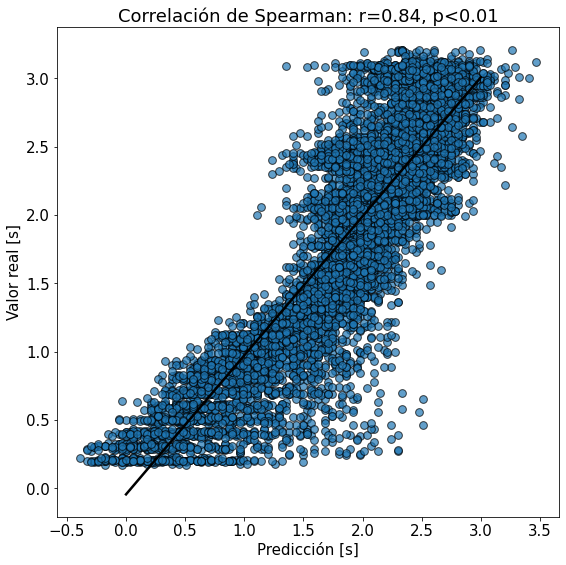

In [35]:
# Generate data: T30
x = [np.round(results['prediction'][i][0] * results['T30_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[0] * results['T30_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_t30['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_t30['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [s]')
ax.set_ylabel('Valor real [s]')

Text(0, 0.5, 'Valor real [dB]')

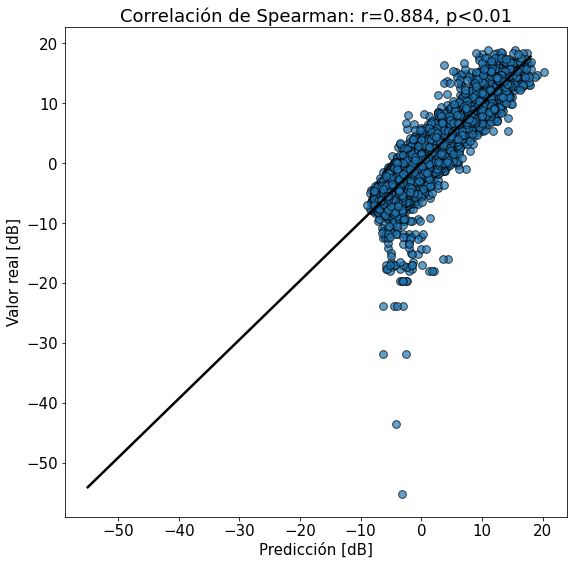

In [36]:
# Generate data: C50
x = [np.round(results['prediction'][i][1] * results['C50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[1] * results['C50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_c50['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_c50['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [dB]')

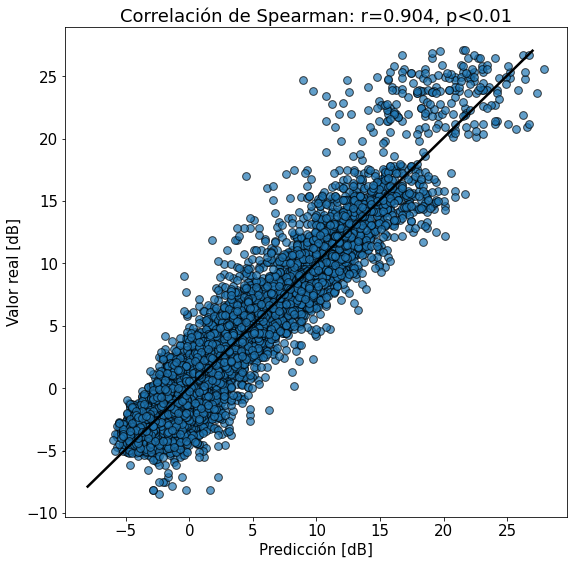

In [37]:
# Generate data: C80
x = [np.round(results['prediction'][i][2] * results['C80_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[2] * results['C80_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_c80['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_c80['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [%]')

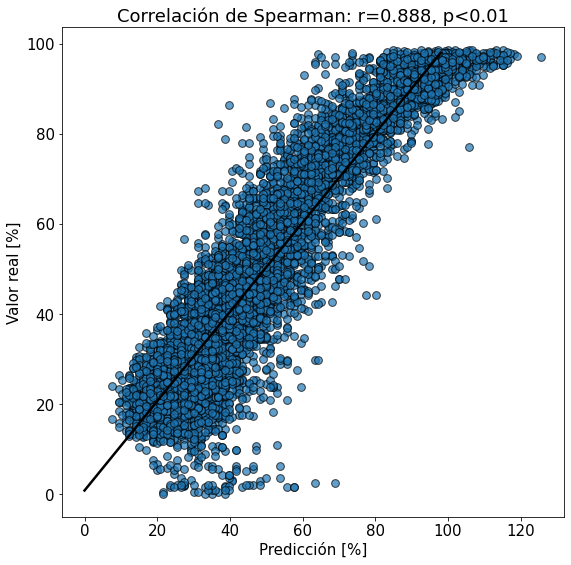

In [38]:
# Generate data: d50
x = [np.round(results['prediction'][i][3] * results['D50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[3] * results['D50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_d50['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_d50['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [%]')
ax.set_ylabel('Valor real [%]')

### Análisis banda 1000 Hz:

In [39]:
band = 1000

resumen_t30['Banda [Hz]'].append(band)
resumen_c50['Banda [Hz]'].append(band)
resumen_c80['Banda [Hz]'].append(band)
resumen_d50['Banda [Hz]'].append(band)

with open(f'../results/exp{exp_num}/results_{band}.pickle', 'rb') as handle:
  results = pickle.load(handle)

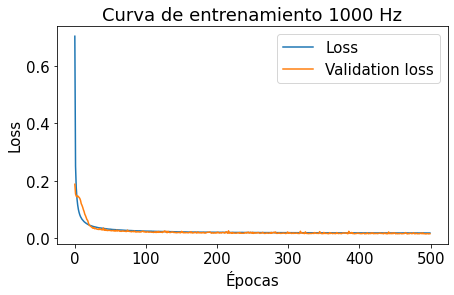

In [40]:
#PLot del val_loss y del loss:
plt.figure(facecolor='white', figsize=[7,4] )
plt.rcParams.update({'font.size': 15})
plt.plot(results['loss'], label='Loss')
plt.plot(results['val_loss'], label='Validation loss')
plt.ylabel('Loss')
plt.xlabel('Épocas')
plt.title(f'Curva de entrenamiento {band} Hz')
plt.legend()
plt.show()

(array([  38.,  269., 1867., 5079., 1807.,  164.,   26.,    9.]),
 array([-0.53   , -0.37625, -0.2225 , -0.06875,  0.085  ,  0.23875,
         0.3925 ,  0.54625,  0.7    ]),
 <BarContainer object of 8 artists>)

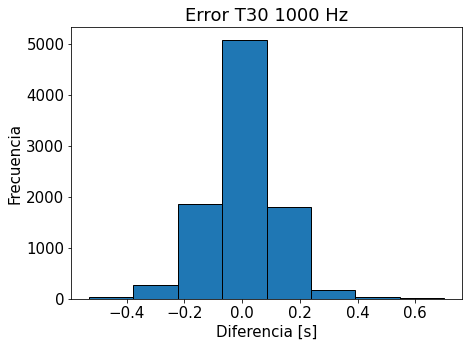

In [41]:
# Error T30:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error T30 {band} Hz')

ax.set_xlabel('Diferencia [s]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_t30'], bins=8, edgecolor="black")

(array([1.229e+03, 7.971e+03, 3.600e+01, 6.000e+00, 5.000e+00, 3.000e+00,
        0.000e+00, 9.000e+00]),
 array([-0.76   , -0.14125,  0.4775 ,  1.09625,  1.715  ,  2.33375,
         2.9525 ,  3.57125,  4.19   ]),
 <BarContainer object of 8 artists>)

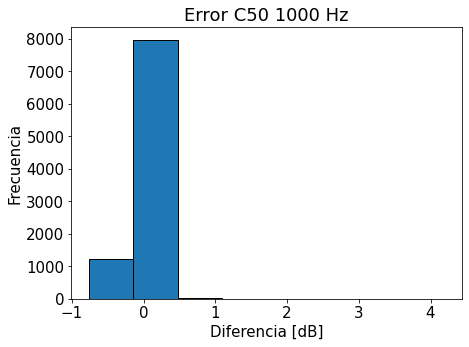

In [42]:
# Error C50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C50 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c50'], bins=8, edgecolor="black")

(array([   8.,   32.,   96., 1126., 6216., 1656.,  116.,    9.]),
 array([-0.85   , -0.66625, -0.4825 , -0.29875, -0.115  ,  0.06875,
         0.2525 ,  0.43625,  0.62   ]),
 <BarContainer object of 8 artists>)

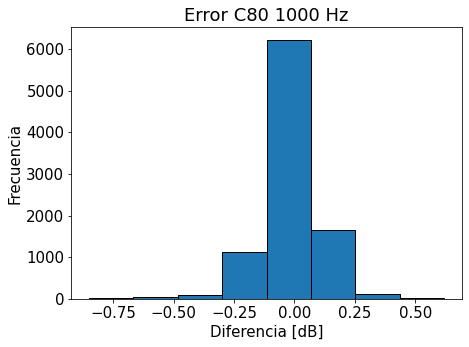

In [43]:
# Error C80:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C80 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c80'], bins=8, edgecolor="black")

(array([2.600e+01, 2.610e+02, 2.056e+03, 5.877e+03, 9.580e+02, 6.700e+01,
        1.000e+01, 4.000e+00]),
 array([-0.46   , -0.32375, -0.1875 , -0.05125,  0.085  ,  0.22125,
         0.3575 ,  0.49375,  0.63   ]),
 <BarContainer object of 8 artists>)

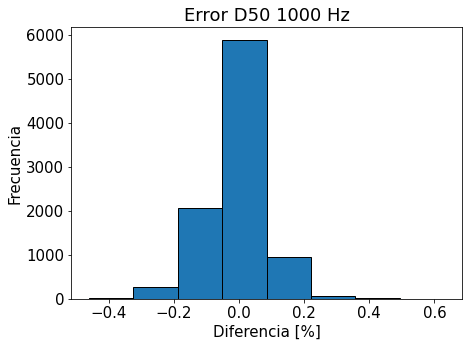

In [44]:
# Error D50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error D50 {band} Hz')

ax.set_xlabel('Diferencia [%]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_d50'], bins=8, edgecolor="black")

Text(0, 0.5, 'Valor real [s]')

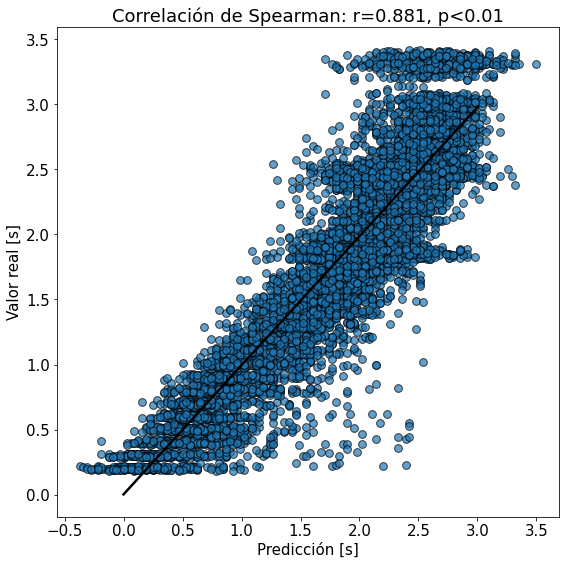

In [45]:
# Generate data: T30
x = [np.round(results['prediction'][i][0] * results['T30_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[0] * results['T30_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_t30['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_t30['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [s]')
ax.set_ylabel('Valor real [s]')

Text(0, 0.5, 'Valor real [dB]')

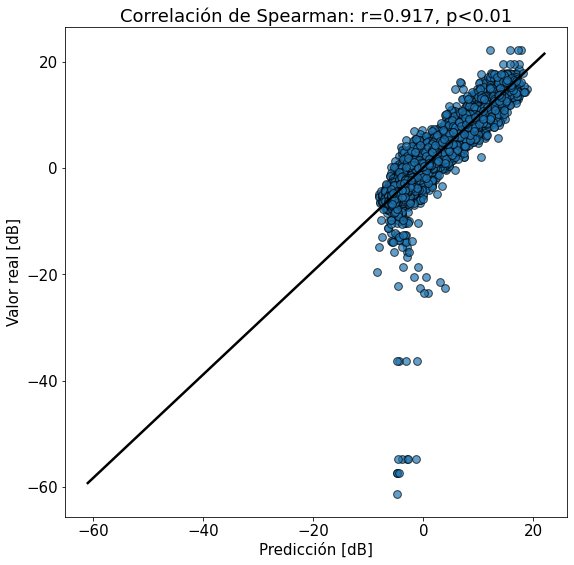

In [46]:
# Generate data: C50
x = [np.round(results['prediction'][i][1] * results['C50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[1] * results['C50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_c50['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_c50['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [dB]')

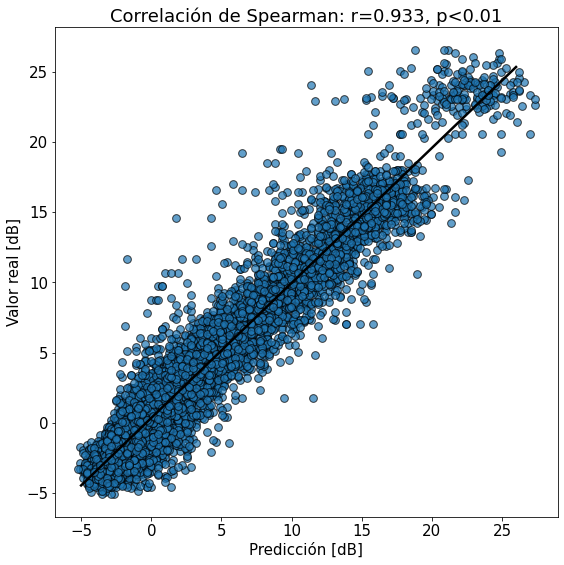

In [47]:
# Generate data: C80
x = [np.round(results['prediction'][i][2] * results['C80_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[2] * results['C80_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_c80['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_c80['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [%]')

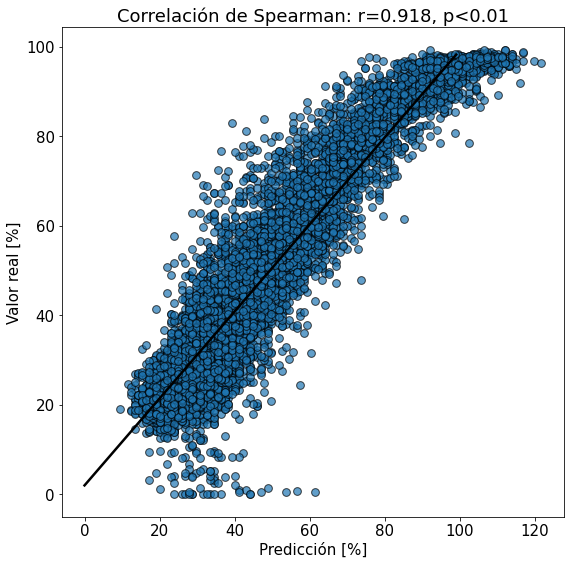

In [48]:
# Generate data: d50
x = [np.round(results['prediction'][i][3] * results['D50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[3] * results['D50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_d50['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_d50['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [%]')
ax.set_ylabel('Valor real [%]')

### Análisis banda 2000 Hz:

In [49]:
band = 2000

resumen_t30['Banda [Hz]'].append(band)
resumen_c50['Banda [Hz]'].append(band)
resumen_c80['Banda [Hz]'].append(band)
resumen_d50['Banda [Hz]'].append(band)

with open(f'../results/exp{exp_num}/results_{band}.pickle', 'rb') as handle:
  results = pickle.load(handle)

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


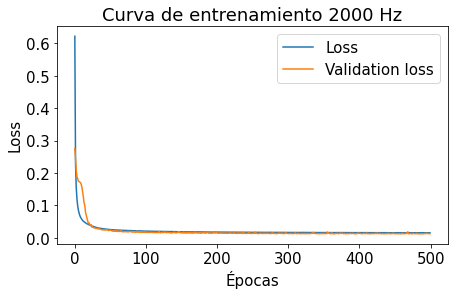

In [50]:
#PLot del val_loss y del loss:
plt.figure(facecolor='white', figsize=[7,4] )
plt.rcParams.update({'font.size': 15})
plt.plot(results['loss'], label='Loss')
plt.plot(results['val_loss'], label='Validation loss')
plt.ylabel('Loss')
plt.xlabel('Épocas')
plt.title(f'Curva de entrenamiento {band} Hz')
plt.legend()
plt.show()

(array([  22.,  334., 1885., 4313., 2534.,  499.,   53.,   12.]),
 array([-0.39, -0.27, -0.15, -0.03,  0.09,  0.21,  0.33,  0.45,  0.57]),
 <BarContainer object of 8 artists>)

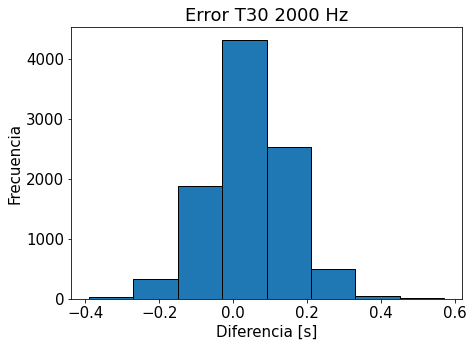

In [51]:
# Error T30:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error T30 {band} Hz')

ax.set_xlabel('Diferencia [s]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_t30'], bins=8, edgecolor="black")

(array([4.404e+03, 5.215e+03, 2.100e+01, 6.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00]),
 array([-0.6 , -0.01,  0.58,  1.17,  1.76,  2.35,  2.94,  3.53,  4.12]),
 <BarContainer object of 8 artists>)

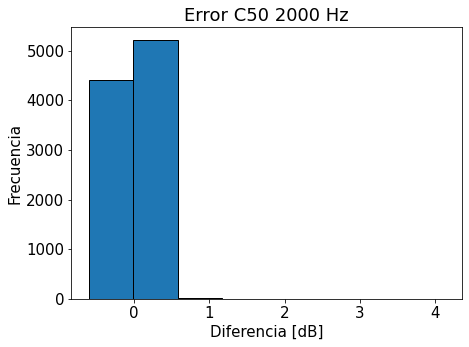

In [52]:
# Error C50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C50 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c50'], bins=8, edgecolor="black")

(array([9.000e+00, 2.600e+01, 1.620e+02, 1.660e+03, 6.283e+03, 1.387e+03,
        1.200e+02, 5.000e+00]),
 array([-0.74 , -0.575, -0.41 , -0.245, -0.08 ,  0.085,  0.25 ,  0.415,
         0.58 ]),
 <BarContainer object of 8 artists>)

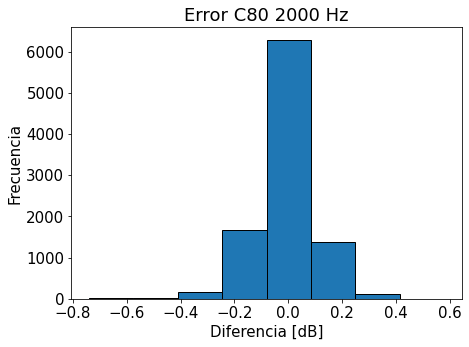

In [53]:
# Error C80:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C80 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c80'], bins=8, edgecolor="black")

(array([3.200e+01, 8.890e+02, 6.353e+03, 2.256e+03, 1.000e+02, 1.300e+01,
        8.000e+00, 1.000e+00]),
 array([-0.42  , -0.2625, -0.105 ,  0.0525,  0.21  ,  0.3675,  0.525 ,
         0.6825,  0.84  ]),
 <BarContainer object of 8 artists>)

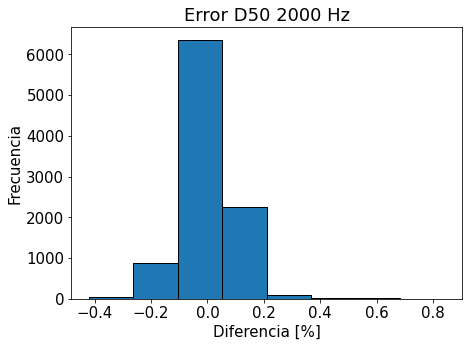

In [54]:
# Error D50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error D50 {band} Hz')

ax.set_xlabel('Diferencia [%]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_d50'], bins=8, edgecolor="black")

Text(0, 0.5, 'Valor real [s]')

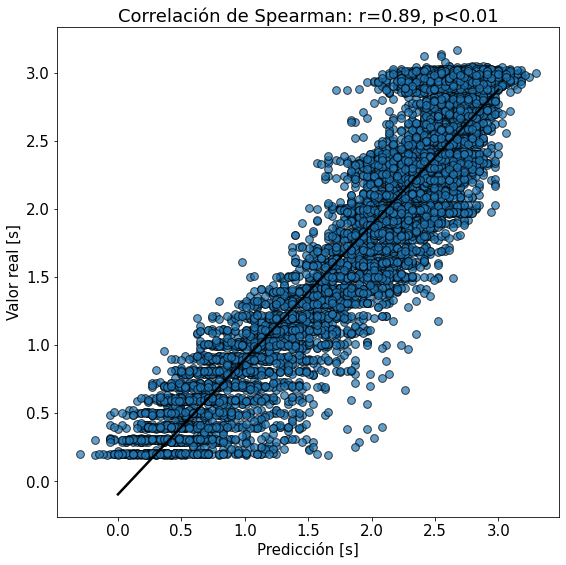

In [55]:
# Generate data: T30
x = [np.round(results['prediction'][i][0] * results['T30_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[0] * results['T30_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_t30['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_t30['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [s]')
ax.set_ylabel('Valor real [s]')

Text(0, 0.5, 'Valor real [dB]')

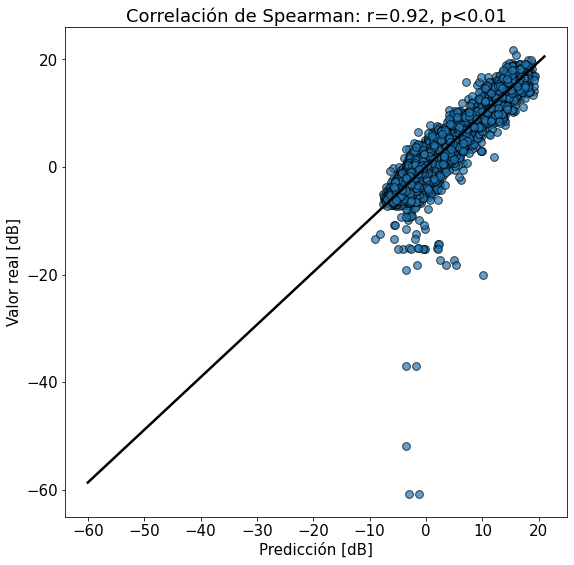

In [56]:
# Generate data: C50
x = [np.round(results['prediction'][i][1] * results['C50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[1] * results['C50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_c50['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_c50['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [dB]')

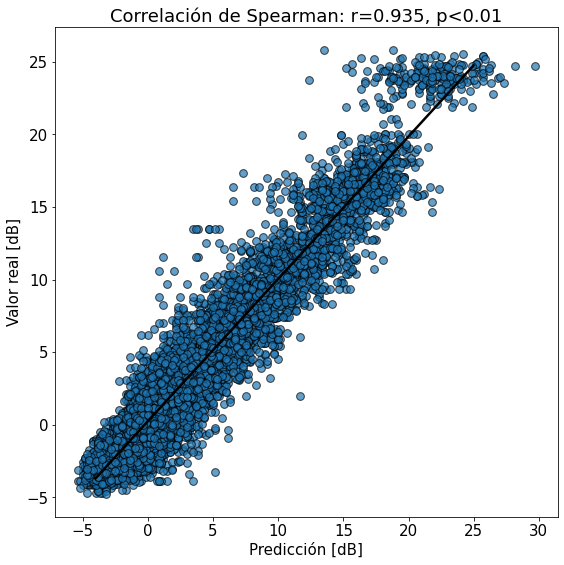

In [57]:
# Generate data: C80
x = [np.round(results['prediction'][i][2] * results['C80_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[2] * results['C80_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_c80['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_c80['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [%]')

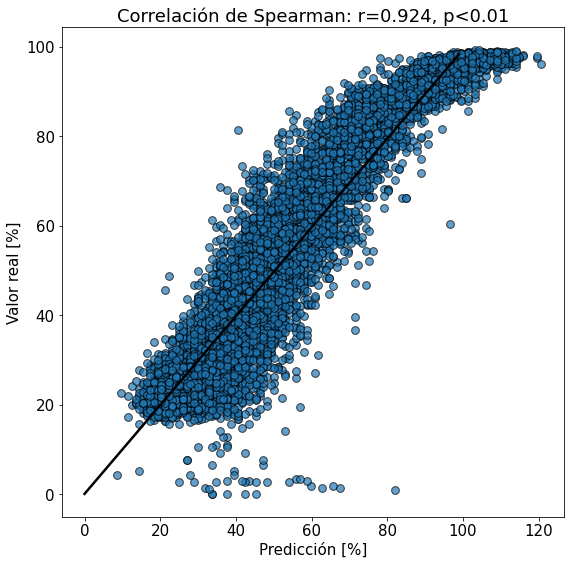

In [58]:
# Generate data: d50
x = [np.round(results['prediction'][i][3] * results['D50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[3] * results['D50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_d50['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_d50['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [%]')
ax.set_ylabel('Valor real [%]')

### Análisis banda 4000 Hz:

In [59]:
band = 4000

resumen_t30['Banda [Hz]'].append(band)
resumen_c50['Banda [Hz]'].append(band)
resumen_c80['Banda [Hz]'].append(band)
resumen_d50['Banda [Hz]'].append(band)

with open(f'../results/exp{exp_num}/results_{band}.pickle', 'rb') as handle:
  results = pickle.load(handle)

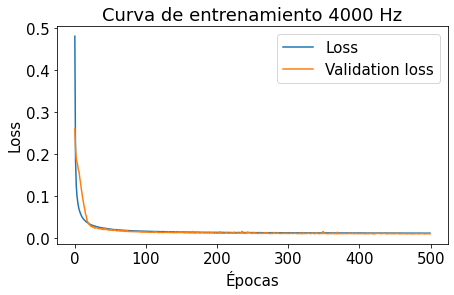

In [60]:
#PLot del val_loss y del loss:
plt.figure(facecolor='white', figsize=[7,4] )
plt.rcParams.update({'font.size': 15})
plt.plot(results['loss'], label='Loss')
plt.plot(results['val_loss'], label='Validation loss')
plt.ylabel('Loss')
plt.xlabel('Épocas')
plt.title(f'Curva de entrenamiento {band} Hz')
plt.legend()
plt.show()

(array([2.000e+00, 0.000e+00, 7.000e+01, 9.460e+02, 6.089e+03, 2.729e+03,
        1.420e+02, 1.600e+01]),
 array([-0.69   , -0.54125, -0.3925 , -0.24375, -0.095  ,  0.05375,
         0.2025 ,  0.35125,  0.5    ]),
 <BarContainer object of 8 artists>)

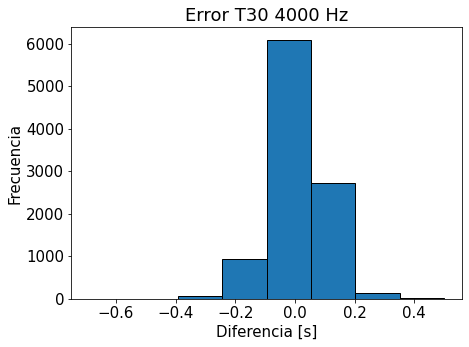

In [61]:
# Error T30:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error T30 {band} Hz')

ax.set_xlabel('Diferencia [s]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_t30'], bins=8, edgecolor="black")

(array([2.309e+03, 7.649e+03, 2.100e+01, 7.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 5.000e+00]),
 array([-0.56  , -0.0875,  0.385 ,  0.8575,  1.33  ,  1.8025,  2.275 ,
         2.7475,  3.22  ]),
 <BarContainer object of 8 artists>)

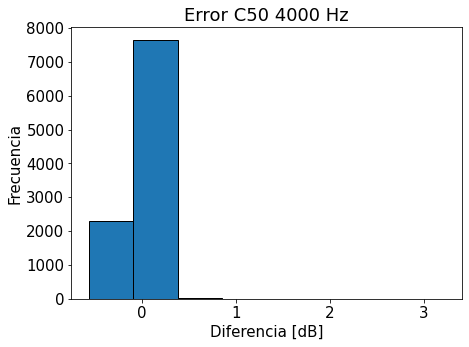

In [62]:
# Error C50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C50 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c50'], bins=8, edgecolor="black")

In [63]:
# Error C80:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C80 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c80'], bins=8, edgecolor="black")

(array([   6.,   19.,   72.,  738., 5767., 3159.,  223.,   10.]),
 array([-0.72   , -0.57375, -0.4275 , -0.28125, -0.135  ,  0.01125,
         0.1575 ,  0.30375,  0.45   ]),
 <BarContainer object of 8 artists>)

In [64]:
# Error D50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error D50 {band} Hz')

ax.set_xlabel('Diferencia [%]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_d50'], bins=8, edgecolor="black")

(array([  27.,  387., 2874., 5845.,  779.,   62.,   13.,    7.]),
 array([-0.43   , -0.30125, -0.1725 , -0.04375,  0.085  ,  0.21375,
         0.3425 ,  0.47125,  0.6    ]),
 <BarContainer object of 8 artists>)

In [65]:
# Generate data: T30
x = [np.round(results['prediction'][i][0] * results['T30_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[0] * results['T30_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_t30['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_t30['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [s]')
ax.set_ylabel('Valor real [s]')

Text(0, 0.5, 'Valor real [s]')

Text(0, 0.5, 'Valor real [dB]')

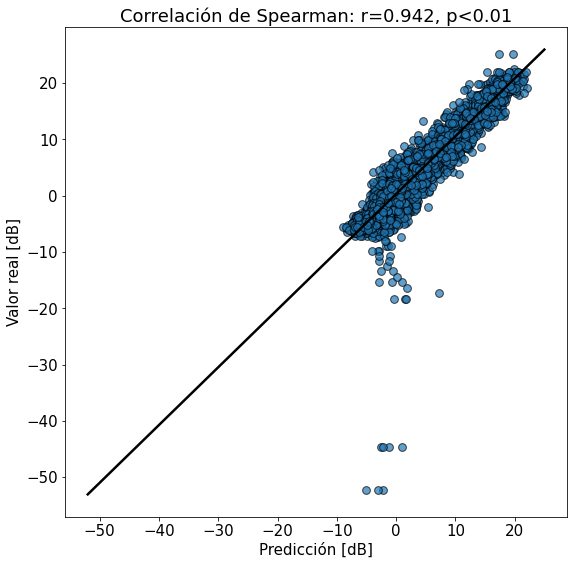

In [66]:
# Generate data: C50
x = [np.round(results['prediction'][i][1] * results['C50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[1] * results['C50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_c50['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_c50['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [dB]')

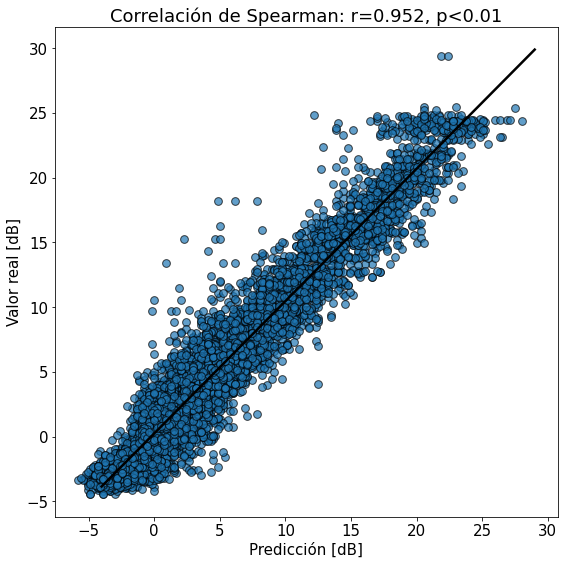

In [67]:
# Generate data: C80
x = [np.round(results['prediction'][i][2] * results['C80_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[2] * results['C80_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_c80['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_c80['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [%]')

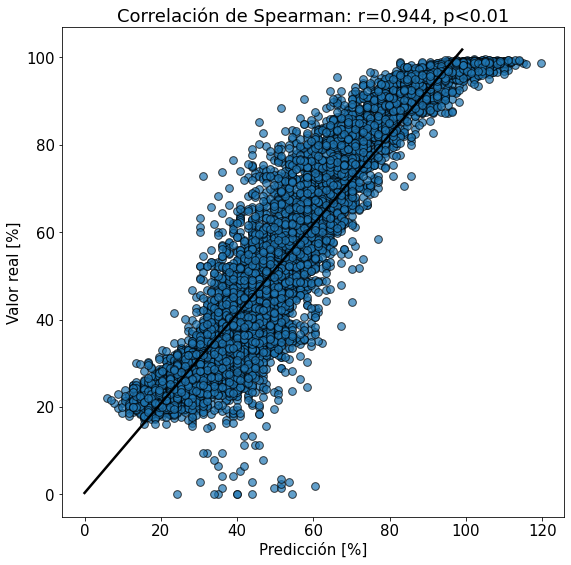

In [68]:
# Generate data: d50
x = [np.round(results['prediction'][i][3] * results['D50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[3] * results['D50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_d50['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_d50['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [%]')
ax.set_ylabel('Valor real [%]')

### Análisis banda 8000 Hz:

In [69]:
band = 8000

resumen_t30['Banda [Hz]'].append(band)
resumen_c50['Banda [Hz]'].append(band)
resumen_c80['Banda [Hz]'].append(band)
resumen_d50['Banda [Hz]'].append(band)

with open(f'../results/exp{exp_num}/results_{band}.pickle', 'rb') as handle:
  results = pickle.load(handle)

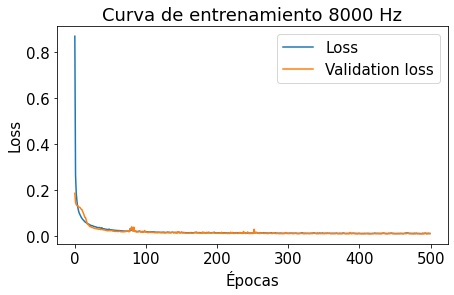

In [70]:
#PLot del val_loss y del loss:
plt.figure(facecolor='white', figsize=[7,4] )
plt.rcParams.update({'font.size': 15})
plt.plot(results['loss'], label='Loss')
plt.plot(results['val_loss'], label='Validation loss')
plt.ylabel('Loss')
plt.xlabel('Épocas')
plt.title(f'Curva de entrenamiento {band} Hz')
plt.legend()
plt.show()

(array([   7.,   81., 1107., 4115., 3673.,  883.,   84.,    7.]),
 array([-0.38   , -0.28125, -0.1825 , -0.08375,  0.015  ,  0.11375,
         0.2125 ,  0.31125,  0.41   ]),
 <BarContainer object of 8 artists>)

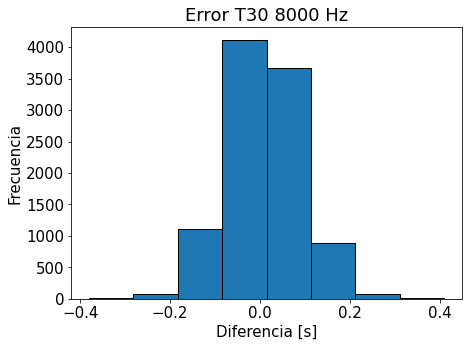

In [71]:
# Error T30:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error T30 {band} Hz')

ax.set_xlabel('Diferencia [s]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_t30'], bins=8, edgecolor="black")

(array([3.220e+02, 7.949e+03, 1.645e+03, 1.300e+01, 9.000e+00, 7.000e+00,
        6.000e+00, 6.000e+00]),
 array([-0.59  , -0.2725,  0.045 ,  0.3625,  0.68  ,  0.9975,  1.315 ,
         1.6325,  1.95  ]),
 <BarContainer object of 8 artists>)

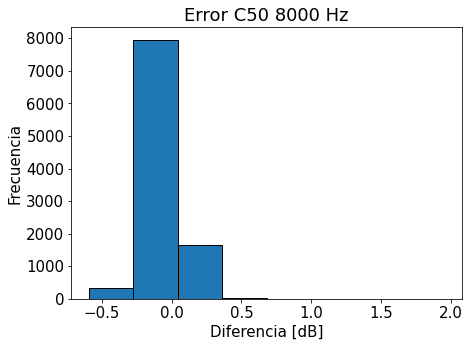

In [72]:
# Error C50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C50 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c50'], bins=8, edgecolor="black")

(array([4.000e+00, 2.400e+01, 9.100e+01, 9.020e+02, 5.716e+03, 2.989e+03,
        2.240e+02, 7.000e+00]),
 array([-0.73   , -0.58375, -0.4375 , -0.29125, -0.145  ,  0.00125,
         0.1475 ,  0.29375,  0.44   ]),
 <BarContainer object of 8 artists>)

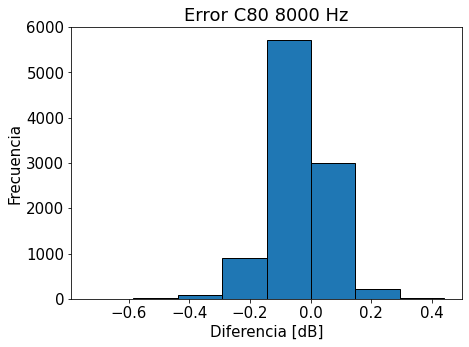

In [73]:
# Error C80:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C80 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c80'], bins=8, edgecolor="black")

(array([  43.,  901., 4831., 3944.,  199.,   15.,   13.,   11.]),
 array([-0.47   , -0.31375, -0.1575 , -0.00125,  0.155  ,  0.31125,
         0.4675 ,  0.62375,  0.78   ]),
 <BarContainer object of 8 artists>)

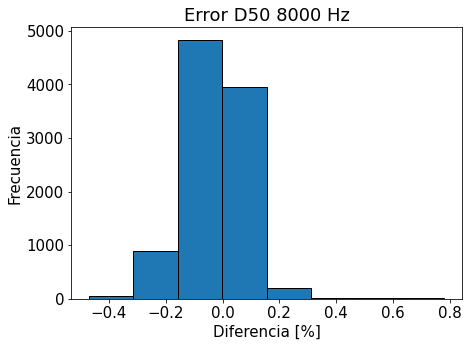

In [74]:
# Error D50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error D50 {band} Hz')

ax.set_xlabel('Diferencia [%]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_d50'], bins=8, edgecolor="black")

Text(0, 0.5, 'Valor real [s]')

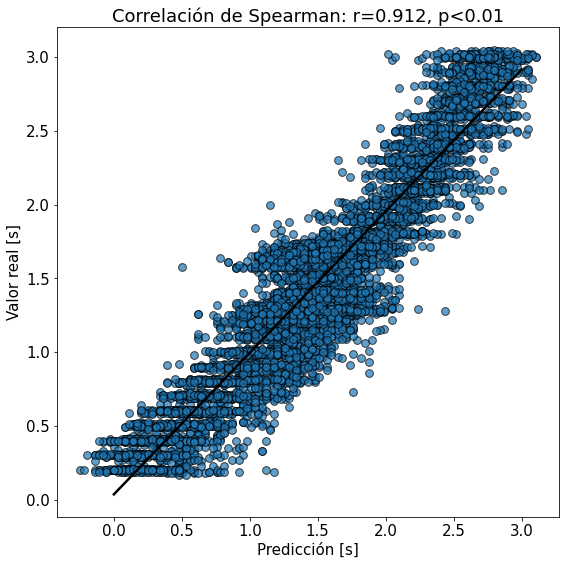

In [75]:
# Generate data: T30
x = [np.round(results['prediction'][i][0] * results['T30_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[0] * results['T30_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_t30['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_t30['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [s]')
ax.set_ylabel('Valor real [s]')

Text(0, 0.5, 'Valor real [dB]')

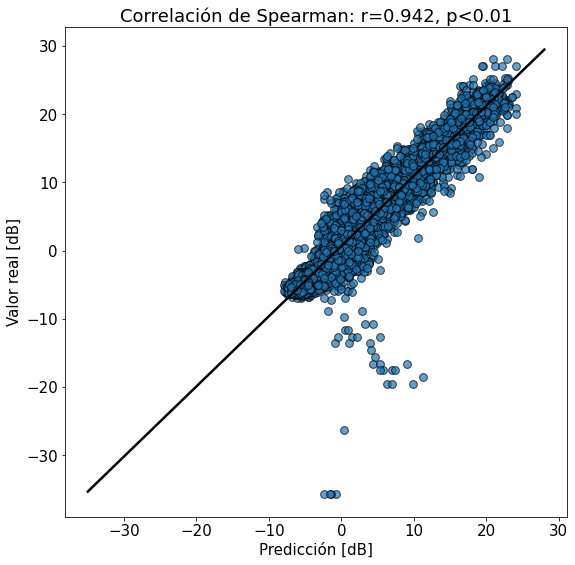

In [76]:
# Generate data: C50
x = [np.round(results['prediction'][i][1] * results['C50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[1] * results['C50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_c50['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_c50['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

In [77]:
# Generate data: C80
x = [np.round(results['prediction'][i][2] * results['C80_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[2] * results['C80_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_c80['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_c80['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [dB]')

In [78]:
# Generate data: d50
x = [np.round(results['prediction'][i][3] * results['D50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[3] * results['D50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_d50['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_d50['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [%]')
ax.set_ylabel('Valor real [%]')

Text(0, 0.5, 'Valor real [%]')

## 3) Estimación con el modelo entrenado:

In [79]:
sys.path.append('../code')
import modeling

In [80]:
blind_estimation_model = modeling.model(filters, kernel_size, activation, pool_size, learning_rate)
blind_estimation_model.load_weights(f'../results/exp{exp_num}/weights_125.h5')

In [81]:
from sklearn.model_selection import train_test_split
tae = list(db.tae.to_numpy())[0:10]
descriptors = list(db.descriptors.to_numpy())[0:10]

tae, descriptors = modeling.reshape_data(tae, descriptors)

X_train, X_test, y_train, y_test = train_test_split(tae, descriptors, test_size=0.2, random_state=222)

y_train, y_test, T30_perc_95, C50_perc_95, C80_perc_95, D50_perc_95 = modeling.normalize_descriptors(descriptors, y_train, y_test)

predict = modeling.prediction(blind_estimation_model, X_test, y_test)

err_t30, err_c50, err_c80, err_d50 = modeling.descriptors_err(predict, y_test)

1/1 [==============================] - 0s 47ms/step


In [82]:
print(predict)
print(y_test)

[array([ 0.9 , -0.78, -0.2 ,  0.31], dtype=float32), array([ 0.82, -0.77, -0.23,  0.26], dtype=float32)]
[[[0.99848214]
  [1.        ]
  [1.        ]
  [1.        ]]

 [[0.97382784]
  [1.64856363]
  [2.24014192]
  [0.66268445]]]


## 4) Resumen:

In [83]:
print('Análisis de resultados T30:\n')

results_t30 = pd.DataFrame(data=resumen_t30)

print(results_t30)

Análisis de resultados T30:

   Banda [Hz]      r    p  Tot audios  Percentil 95    Max    Min
0         125  0.919  0.0       32845         2.906  5.038  0.048
1         250  0.895  0.0       34725         2.885  3.190  0.173
2         500  0.840  0.0       45436         2.993  3.213  0.171
3        1000  0.881  0.0       46292         3.100  3.421  0.184
4        2000  0.890  0.0       48259         2.969  3.179  0.189
5        4000  0.913  0.0       49968         2.805  3.042  0.191
6        8000  0.912  0.0       49784         2.801  3.047  0.169


In [84]:
print('Análisis de resultados C50:\n')

results_c50 = pd.DataFrame(data=resumen_c50)

print(results_c50)

Análisis de resultados C50:

   Banda [Hz]      r    p  Tot audios  Percentil 95     Max     Min
0         125  0.762  0.0       32845         6.776  21.966 -39.778
1         250  0.826  0.0       34725        10.744  18.684 -29.691
2         500  0.884  0.0       45436        12.296  20.633 -55.247
3        1000  0.917  0.0       46292        13.527  22.323 -61.416
4        2000  0.920  0.0       48259        14.454  21.808 -60.862
5        4000  0.942  0.0       49968        15.602  25.120 -52.364
6        8000  0.942  0.0       49784        17.972  30.173 -35.736


In [85]:
print('Análisis de resultados C80:\n')

results_c80 = pd.DataFrame(data=resumen_c80)

print(results_c80)

Análisis de resultados C80:

   Banda [Hz]      r    p  Tot audios  Percentil 95     Max     Min
0         125  0.819  0.0       32845        13.773  29.137 -33.154
1         250  0.876  0.0       34725        14.557  30.478 -10.743
2         500  0.904  0.0       45436        14.928  27.140  -8.512
3        1000  0.933  0.0       46292        15.801  26.568  -5.096
4        2000  0.935  0.0       48259        16.673  25.831  -4.793
5        4000  0.952  0.0       49968        18.690  29.426  -4.459
6        8000  0.953  0.0       49784        21.512  35.368  -4.164


In [86]:
print('Análisis de resultados D50:\n')

results_d50 = pd.DataFrame(data=resumen_d50)

print(results_d50)

Análisis de resultados D50:

   Banda [Hz]      r    p  Tot audios  Percentil 95     Max    Min
0         125  0.769  0.0       32845        82.637  99.368  0.011
1         250  0.829  0.0       34725        92.229  98.664  0.107
2         500  0.888  0.0       45436        94.434  99.143  0.000
3        1000  0.918  0.0       46292        95.749  99.418  0.000
4        2000  0.924  0.0       48259        96.538  99.345  0.000
5        4000  0.944  0.0       49968        97.321  99.693  0.001
6        8000  0.943  0.0       49784        98.430  99.904  0.027
